In [138]:
import missingno as msno
from tqdm.notebook import tqdm
from konlpy import *

In [2]:
og_raw_data = pd.read_csv('./bookcontents2.csv',error_bad_lines=False)

b'Skipping line 16: expected 6 fields, saw 10\nSkipping line 19: expected 6 fields, saw 10\nSkipping line 20: expected 6 fields, saw 9\nSkipping line 73: expected 6 fields, saw 14\nSkipping line 149: expected 6 fields, saw 11\nSkipping line 150: expected 6 fields, saw 10\nSkipping line 165: expected 6 fields, saw 16\nSkipping line 167: expected 6 fields, saw 23\nSkipping line 198: expected 6 fields, saw 13\nSkipping line 208: expected 6 fields, saw 48\nSkipping line 239: expected 6 fields, saw 11\nSkipping line 260: expected 6 fields, saw 12\nSkipping line 327: expected 6 fields, saw 14\nSkipping line 347: expected 6 fields, saw 14\nSkipping line 354: expected 6 fields, saw 26\nSkipping line 399: expected 6 fields, saw 9\nSkipping line 405: expected 6 fields, saw 7\nSkipping line 442: expected 6 fields, saw 28\nSkipping line 468: expected 6 fields, saw 16\nSkipping line 488: expected 6 fields, saw 30\nSkipping line 501: expected 6 fields, saw 34\nSkipping line 511: expected 6 fields, s

In [2]:
og_raw_data = pd.read_csv('./bookcontents3.csv',error_bad_lines=False)

b'Skipping line 6: expected 6 fields, saw 8\nSkipping line 14: expected 6 fields, saw 30\nSkipping line 24: expected 6 fields, saw 9\nSkipping line 64: expected 6 fields, saw 12\nSkipping line 69: expected 6 fields, saw 18\nSkipping line 71: expected 6 fields, saw 15\nSkipping line 149: expected 6 fields, saw 20\nSkipping line 177: expected 6 fields, saw 14\nSkipping line 194: expected 6 fields, saw 8\nSkipping line 227: expected 6 fields, saw 14\nSkipping line 236: expected 6 fields, saw 14\nSkipping line 239: expected 6 fields, saw 22\nSkipping line 244: expected 6 fields, saw 10\nSkipping line 262: expected 6 fields, saw 16\nSkipping line 295: expected 6 fields, saw 8\nSkipping line 298: expected 6 fields, saw 7\nSkipping line 312: expected 6 fields, saw 14\nSkipping line 356: expected 6 fields, saw 19\nSkipping line 368: expected 6 fields, saw 22\nSkipping line 560: expected 6 fields, saw 10\nSkipping line 622: expected 6 fields, saw 54\nSkipping line 643: expected 6 fields, saw 10

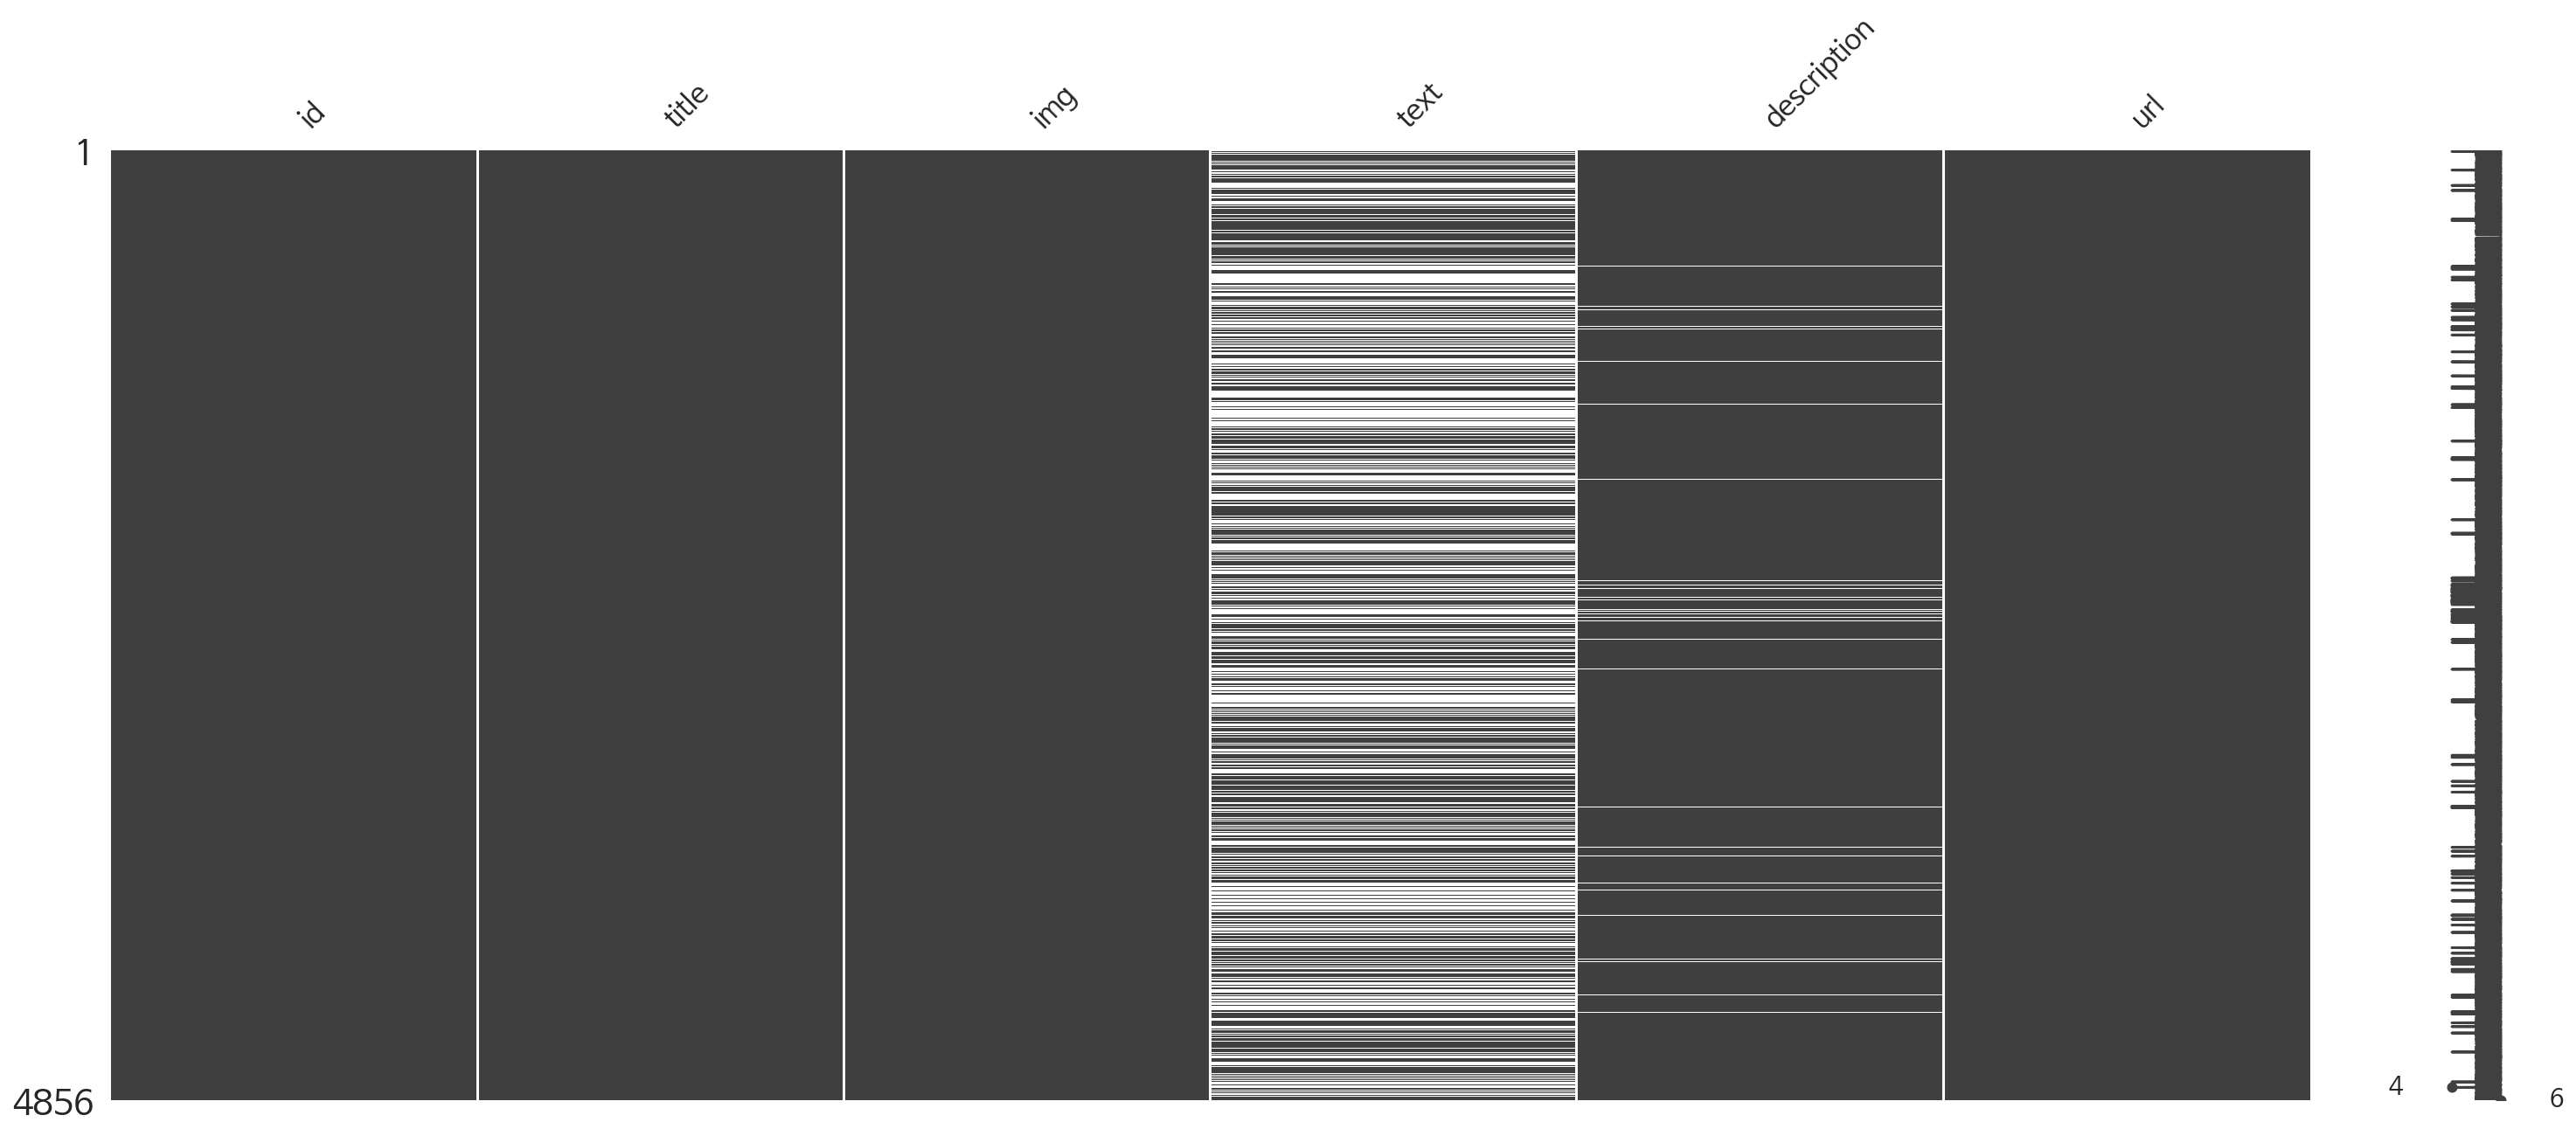

In [368]:
msno.matrix(og_raw_data)

In [3]:
og_raw_data = og_raw_data.drop_duplicates('title',keep='first')

## desctiption


In [4]:
desc_data = og_raw_data[['id','description','title']]

In [5]:
desc_data = desc_data.dropna(axis=0)
desc_data.shape

(4384, 3)

## text

In [6]:
text_data = og_raw_data[['id','text','title']]

In [7]:
text_data = text_data.dropna(axis=0)
text_data.shape

(2529, 3)

## desc + text

In [8]:
og_raw_data['text'] = og_raw_data['text'].fillna(' ')

In [9]:
og_raw_data['desc_text'] = og_raw_data['description'] + og_raw_data['text']

In [10]:
desc_text = og_raw_data.dropna(axis=0)
desc_text= desc_text.drop_duplicates('title',keep='first')

In [11]:
desc_text.shape

(4384, 7)

## 형태소 분석

In [140]:
from konlpy.tag import *
# hannanum = Hannanum()
okt = Okt()

In [17]:
desc_data = [desc_data for desc_data in desc_data['description']]
desc_data = tqdm(desc_data)

desc_tokens = [okt.morphs(row) for row in desc_data]
len(desc_tokens)

4384

In [18]:
text_data = [text_data for text_data in text_data['text']]
text_data = tqdm(text_data)

text_tokens = [okt.morphs(row) for row in text_data]
len(text_tokens)

2529

In [19]:
desc_text_data = [desc_text_data for desc_text_data in desc_text['desc_text']]
desc_text_data = tqdm(desc_text_data)

text_contents_tokens = [okt.morphs(row) for row in desc_text_data]
len(text_contents_tokens)

4384

In [20]:
import pickle 
## Save pickle
with open("desc_tokens2.pickle","wb") as fw:
    pickle.dump(desc_tokens, fw)

In [21]:
import pickle 
## Save pickle
with open("text_tokens2.pickle","wb") as fw:
    pickle.dump(text_tokens, fw)

In [22]:
import pickle 
## Save pickle
with open("text_contents_tokens2.pickle","wb") as fw:
    pickle.dump(text_contents_tokens, fw)

In [25]:
import pickle 
## Load pickle
with open("desc_tokens.pickle","rb") as fr:
    desc_tokens = pickle.load(fr)
len(desc_tokens)
#['a', 'b', 'c']

8293

## pickle 파일 로드

In [12]:
import pickle 
## Load pickle
with open("text_tokens2.pickle","rb") as fr:
    text_tokens = pickle.load(fr)
len(text_tokens)
#['a', 'b', 'c']

2529

In [21]:
import pickle 
## Load pickle
with open("desc_tokens2.pickle","rb") as fr:
    desc_tokens = pickle.load(fr)
len(desc_tokens)
#['a', 'b', 'c']

4384

In [14]:
import pickle 
## Load pickle
with open("text_contents_tokens2.pickle","rb") as fr:
    text_contents_tokens = pickle.load(fr)
len(text_contents_tokens)
#['a', 'b', 'c']

4384

## stop words 설정

In [15]:
with open('ko_stop_words.txt') as text:
    lines = text.readlines()

In [16]:
stop_words1 = ['.','(',')',',',"'",'%','-','X',').','.','---','p','"','']

In [17]:
stop_words2 = [ line.replace('\n','') for line in lines]

In [18]:
stop_words = stop_words1 + stop_words2

## 시리즈 형태로 바꿔서 apply 함수 적용

In [19]:
text_tokens_series = pd.Series(text_tokens)
text_tokens = text_tokens_series.apply(lambda x : [w for w in x if w not in stop_words])  
len(text_tokens)

2529

In [22]:
desc_tokens_series = pd.Series(desc_tokens)
desc_tokens = desc_tokens_series.apply(lambda x : [w for w in x if w not in stop_words])  
len(desc_tokens)

4384

In [23]:
text_contents_tokens_series = pd.Series(text_contents_tokens)
text_contents_tokens = text_contents_tokens_series.apply(lambda x : [w for w in x if w not in stop_words])  
len(text_contents_tokens)

4384

## 띄워쓰기가 있는 문장으로 변환

In [24]:
contents_for_vectorize = []

for content in text_contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    contents_for_vectorize.append(sentence)
    
len(contents_for_vectorize)

4384

## CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)

In [26]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4384x90152 sparse matrix of type '<class 'numpy.int64'>'
	with 1022351 stored elements in Compressed Sparse Row format>

## Tf-itf

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 1, decode_error = 'ignore')

In [39]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4384x90152 sparse matrix of type '<class 'numpy.float64'>'
	with 1022351 stored elements in Compressed Sparse Row format>

In [40]:
num_samples, num_fetures = X.shape
num_samples, num_fetures

(4384, 90152)

## pairwise_distances 구하기

In [41]:
from sklearn.metrics import pairwise_distances

In [45]:
book_matrix = pairwise_distances(X,X,metric='cosine')

In [46]:
def title_idx(data,title):
    a = pd.DataFrame(np.argsort(book_matrix))[0].apply(lambda x : data.iloc[x])
    return a[a['title'] == title].index

In [47]:
og_raw_data[og_raw_data['title'] == '개미 (2)']

,id,title,img,text,description,url,desc_text
3928,4138,개미 (2),http://image.yes24.com/momo/TopCate408/MidCate...,지하 40층. 많은 개미들이 움직이고 있다. 8월의 더위가 한창 기승을 부리고 있는...,프랑스의 천재 작가 베르나르 베르베르의 〈개미〉는 인간 세계와 개미 세계의 만남과 ...,https://www.yes24.com/Product/Goods/185464,프랑스의 천재 작가 베르나르 베르베르의 〈개미〉는 인간 세계와 개미 세계의 만남과 ...


In [52]:
title_idx(desc_text,'개미 (2)')

Int64Index([3589], dtype='int64')

In [33]:
def check_book(data,idx):
    return og_raw_data[og_raw_data['id'] == data.iloc[idx][0]]

In [ ]:
def 

## 책 추천 함수

In [93]:
def check_book(data,idx):
    return og_raw_data[og_raw_data['id'] == data.iloc[idx][0]]

In [123]:
def book_recommender(title, data=desc_text ,tokens=text_contents_tokens, vectorizer='count', metric='euclidean', num=10):
    contents_for_vectorize = []

    for content in text_contents_tokens:
        sentence = ''
        for word in content:
            sentence = sentence + ' ' + word

        contents_for_vectorize.append(sentence)

    if vectorizer == 'count':
        vectorizer = CountVectorizer(min_df=1)
        X = vectorizer.fit_transform(contents_for_vectorize)
    else:
        vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')
        X = vectorizer.fit_transform(contents_for_vectorize)

    book_matrix = pairwise_distances(X, X, metric=metric)

    book_dist_df = pd.DataFrame(np.argsort(book_matrix))[
        0].apply(lambda x: data.iloc[x])
    idx = book_dist_df[book_dist_df['title'] == title].index[0]
    print('벡터라이즈 방식: ', str(vectorizer)[:5], ', 거리 구하는 방식 : ', metric)
    print("="*50)
    for i in np.argsort(book_matrix[idx])[:num]:
        result_df = check_book(data, i)
        print(result_df[['id', 'title', 'url']])

In [180]:
book_recommender('데미안',vectorizer='count')

벡터라이즈 방식:  Count , 거리 구하는 방식 :  euclidean
        id title                                          url
1881  1983   데미안  https://www.yes24.com/Product/Goods/9019369
        id   title                                         url
1512  1592  달과 6펜스  https://www.yes24.com/Product/Goods/135880
        id    title                                          url
3250  3428  애도하는 사람  https://www.yes24.com/Product/Goods/3679403
      id      title                                          url
286  303  퇴마록 국내편 2  https://www.yes24.com/Product/Goods/5637187
    id      title                                          url
24  28  퇴마록 국내편 1  https://www.yes24.com/Product/Goods/5637185
    id            title                                           url
29  33  소설 보다 : 가을 2019  https://www.yes24.com/Product/Goods/84498048
        id      title                                           url
3396  3584  다정검객무정검 4  https://www.yes24.com/Product/Goods/81689503
    id       title                            

In [181]:
book_recommender('데미안',vectorizer='count',metric='cosine')

벡터라이즈 방식:  Count , 거리 구하는 방식 :  cosine
        id title                                          url
1881  1983   데미안  https://www.yes24.com/Product/Goods/9019369
      id      title                                           url
316  334  내게 무해한 사람  https://www.yes24.com/Product/Goods/61778623
        id      title                                         url
4744  5029  눈먼 자들의 도시  https://www.yes24.com/Product/Goods/318766
        id title                                           url
4625  4896  방랑자들  https://www.yes24.com/Product/Goods/80128261
        id       title                                           url
3679  3878  고슴도치의 우아함   https://www.yes24.com/Product/Goods/23059727
        id title                                           url
3954  4169    왕국  https://www.yes24.com/Product/Goods/59158807
        id            title                                          url
4759  5044  제대로 된 시체답게 행동해!  https://www.yes24.com/Product/Goods/5533457
        id           title           

In [134]:
book_recommender('빨강 머리 앤',vectorizer='tfitf')

벡터라이즈 방식:  Tfidf , 거리 구하는 방식 :  euclidean
        id    title                                           url
1462  1541  빨강 머리 앤  https://www.yes24.com/Product/Goods/73008181
        id        title                                           url
1762  1858  초판본 빨강 머리 앤  https://www.yes24.com/Product/Goods/88389984
        id           title                                           url
2226  2347  빨강 머리 앤 미니북 세트  https://www.yes24.com/Product/Goods/76163800
        id                                       title  \
1736  1830  빨강 머리 앤(Anne of Green Gables) 한글판 + 영문판 세트   

                                               url  
1736  https://www.yes24.com/Product/Goods/79261152  
        id             title                                           url
1422  1497  빨강 머리 앤 미니미니북 세트  https://www.yes24.com/Product/Goods/78573144
        id            title                                           url
2423  2550  빨강 머리 앤 미니미니북 3  https://www.yes24.com/Product/Goods/78573079
        id         

In [135]:
book_recommender('빨강 머리 앤',vectorizer='tfitf',metric='cosine')

벡터라이즈 방식:  Tfidf , 거리 구하는 방식 :  cosine
        id    title                                           url
1462  1541  빨강 머리 앤  https://www.yes24.com/Product/Goods/73008181
        id        title                                           url
1762  1858  초판본 빨강 머리 앤  https://www.yes24.com/Product/Goods/88389984
        id           title                                           url
2226  2347  빨강 머리 앤 미니북 세트  https://www.yes24.com/Product/Goods/76163800
        id                                       title  \
1736  1830  빨강 머리 앤(Anne of Green Gables) 한글판 + 영문판 세트   

                                               url  
1736  https://www.yes24.com/Product/Goods/79261152  
        id             title                                           url
1422  1497  빨강 머리 앤 미니미니북 세트  https://www.yes24.com/Product/Goods/78573144
        id            title                                           url
2423  2550  빨강 머리 앤 미니미니북 3  https://www.yes24.com/Product/Goods/78573079
        id            

## 테스트 문장 만들기

In [172]:
new_post = ['오늘 날씨 진짜 좋다. 어디 놀러가고 싶다']
new_post_tokens = [ okt.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 오늘 날씨 진짜 좋다 . 어디 놀러 가고 싶다']

In [173]:
new_post_for_vectorize = [w for w in new_post_for_vectorize if w not in stop_words]

In [174]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

## 유클리드 거리 

In [175]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [176]:
dist = [dist_raw(each, new_post_vec) for each in X]

In [177]:
import operator
dist_dict = dict(enumerate(dist))
sorted_dict = sorted(dist_dict.items(), key=operator.itemgetter(1))

In [178]:
print('Best 5 post is ', sorted_dict[:5])
print('Test post is --> ', new_post)

Best 5 post is  [(1529, 1.346657153407163), (1024, 1.3520520425545692), (770, 1.3522537873257066), (946, 1.3568268371345418), (2449, 1.358282631035979)]
Test post is -->  ['오늘 날씨 진짜 좋다. 어디 놀러가고 싶다']


In [179]:
result_list = []
for num in sorted_dict[:10]:
    result = og_raw_data[og_raw_data['id'] == desc_data.iloc[num[0]]['id']]
    result_list.append(result[['id','title','text','description','url']])
pd.concat(result_list)

,id,title,text,description,url
1622,1707,내가 사랑했던 모든 남자들에게 세트,아주 정확히 말하면 이것들은 연애편지가 아니다. 더 이상 사랑하고 싶지 않을 때 쓰...,"전 세계 100만 부 이상 판매, 27개국 번역 출간2018 넷플릭스 오리지널 최고...",https://www.yes24.com/Product/Goods/73270279
1070,1112,너라는 우주에 나를 부치다,,김경의 첫번째 소설 [너라는 우주에 나를 부치다]. 이 소설은 수많은 실패 끝에 진...,https://www.yes24.com/Product/Goods/14939297
796,829,놀러 가자고요,"모가 자라는 한 달여 동안, 막내 윤 씨는 지구를 떠나고 싶었다.모의 안부를 궁금해...",“사는 날 동안 얼굴 붉히면서 살 거 뭐 있나.같이 놀러나 댕기자”거침없이 콸콸 쏟...,https://www.yes24.com/Product/Goods/61304917
984,1023,졸의 전쟁,,이 책은 그렇게 비장하거나 거대담론을 담고 있지는 않다. 소설의 인물들은 계층의 가...,https://www.yes24.com/Product/Goods/85643065
2692,2838,"언제나 그리고 영원히, 라라 진",이 대학에 입학한다면 가장 하고 싶은 게 뭘까? 하고 싶은 건 정말 많은데 하나만 ...,"“일련의 소동을 둘러싼 연애소설인 동시에, 자매간의 우애를 다룬 훌륭한 가족소설이기...",https://www.yes24.com/Product/Goods/73270242
1501,1581,동물 농장,나흘 뒤 오후 늦은 시간에 나폴레옹은 모든 동물에게 마당으로 모이라고 지시했다. 동...,출간 이후 단 한번도 절판된 적이 없는 영원한 고전조지 오웰의 뛰어난 창조력이 만든...,https://www.yes24.com/Product/Goods/89325695
4041,4265,오르부아르,"알베르의 얼굴이 새파랗게 질리고, 관자놀이가 상상하기 힘든 속도로 고동친다. 몸속...","프랑스 문학의 새로운 방향!이 시대에 출간된 가장 아름다운 문학! 천재적이고, 박진...",https://www.yes24.com/Product/Goods/22793142
909,947,우주를 담아줘,“술 또 샀어? 집에 많은데.” “많기는. 많은 술이 어딨어. 곧 없어질 술이지....,“이 소설이야말로 덕업일치의 현장이고 성덕(성공한 덕후)의 길이 아닐까.” 경쾌하지...,https://www.yes24.com/Product/Goods/73776263
2865,3028,날씨의 아이,-요컨대 나는 어른이 되고 싶지 않아 고집을 부리고 있었다. 내가 보기에도 정말 한...,"“이제 비는 그치고, 우리의 세상이 빛나기 시작할 거야” 고등학교 1학년 여름, 가...",https://www.yes24.com/Product/Goods/80218273
389,409,파멸일기,“가정의 문제는 절대로 없습니다. 잘난 체 하지 마시고 우리 가족을 위해서라면 그냥...,"같은 이름, 다른 인생 이제는 더 이상 참을 수 없는, 나는 오늘 죽으러 갑니다.‘...",https://www.yes24.com/Product/Goods/89929143
